# Project Name: Flight Fare Prediction 
#### using ML and Auto SK Learn(Auto ML)

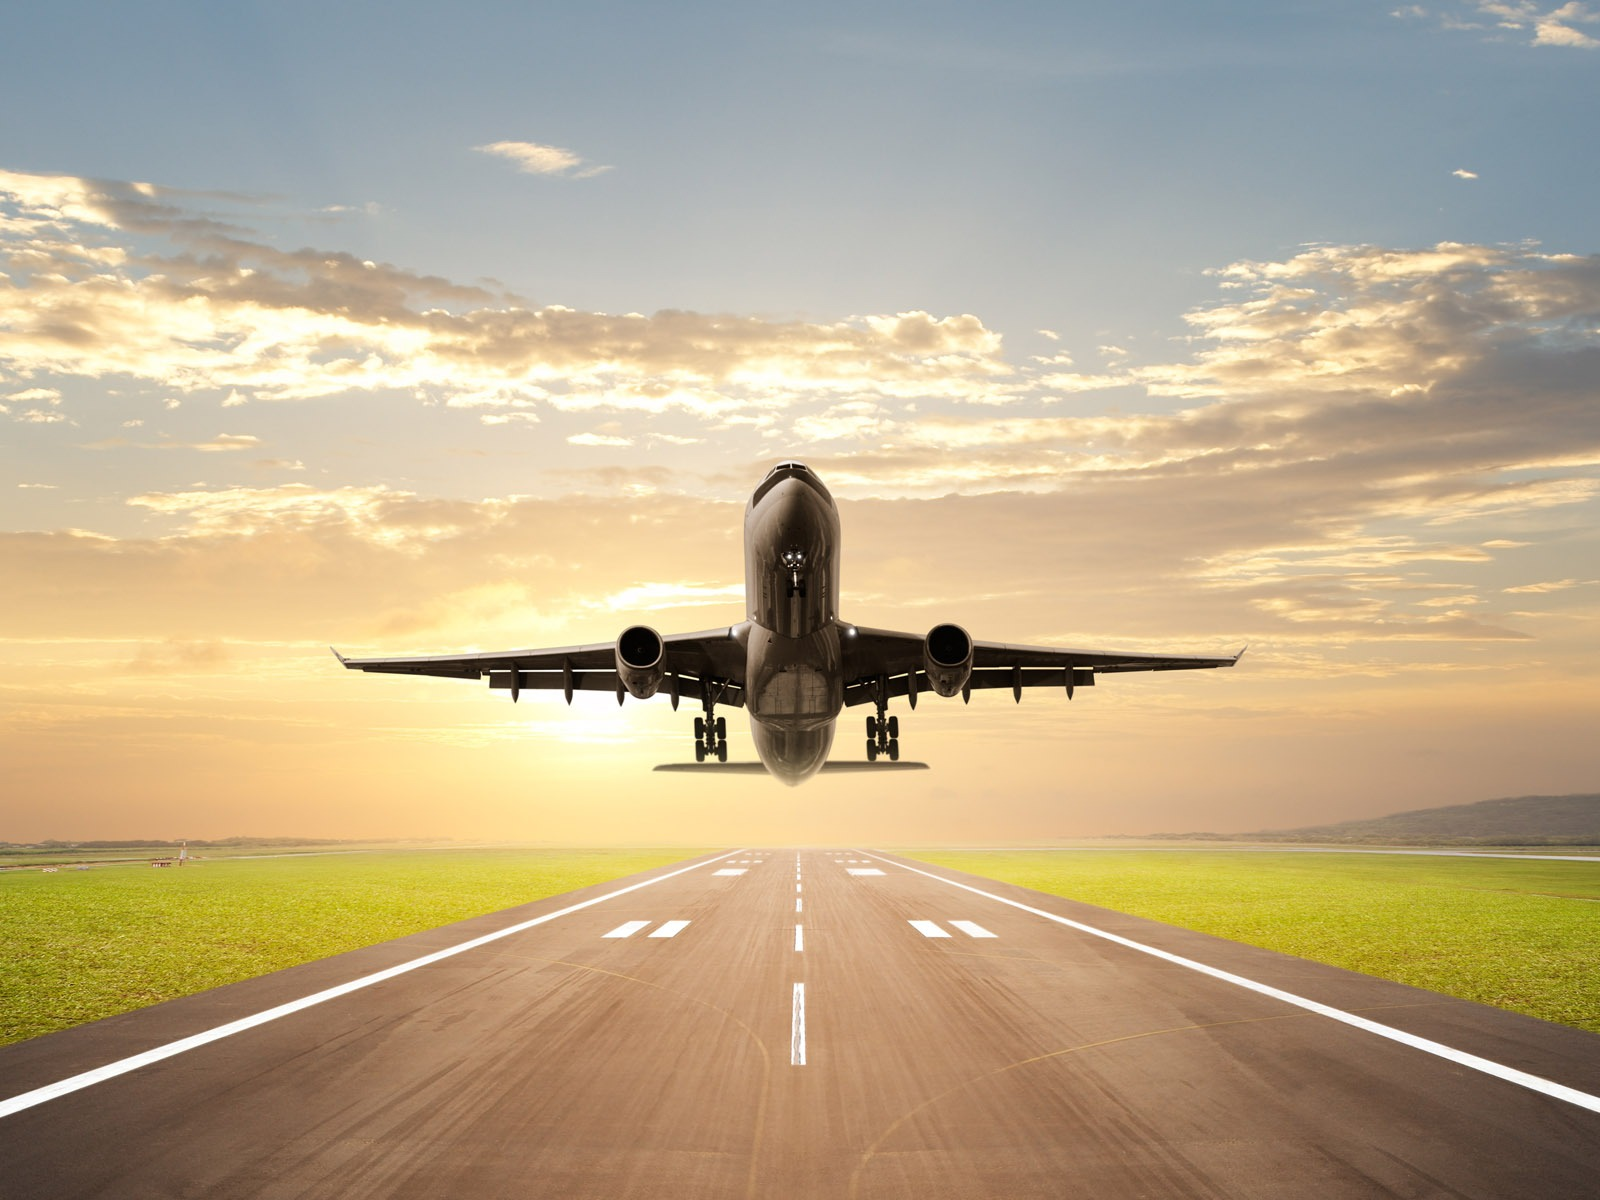

#### In this project we will be predicting the Fare of a flight a person has to give on inputting the data using the normal Machine Learning techniques then we will see how we can do the same thing with the help of using Auto SK Learn which is a Auto ML Library.

## Context :

#### We have often heared travellers saying Flight TIckets are often very unpredictable and are very hard to guess. If one might see a  price today and checks the same flight price tommorow it's a whole different story by then. 

#### Let us create a Machine Learning Model which will help us in predicting the prices of a flight on inputting some of the attributes. Here we will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### We will do the following things in our Notebook:
- Data Analysis 
- Feature Engineering 
- Feature Selection
- Model Building using ML
- Modle Building using Auto SK Learn(Auto ML)

### So let's dive in and read our data, but first we will import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading our Data set

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/flight data.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df1= pd.read_csv("/content/drive/MyDrive/flight test.csv")

In [ ]:
df1.head()

In [ ]:
df1.shape

### We will combine both the data for the purpose of Feature Engineering

In [ ]:
total_df= df.append(df1,sort= False)

In [ ]:
total_df.tail()

In [ ]:
total_df.head()

In [ ]:
total_df.shape

### Understanding our Data

#### Size of training set: 10683 records

#### Size of test set: 2671 records

### FEATURES: 

#### Airline: The name of the airline.

#### Date_of_Journey: The date of the journey

#### Source: The source from which the service begins.

#### Destination: The destination where the service ends.

#### Route: The route taken by the flight to reach the destination.

#### Dep_Time: The time when the journey starts from the source.

#### Arrival_Time: Time of arrival at the destination.

#### Duration: Total duration of the flight.

#### Total_Stops: Total stops between the source and destination.

#### Additional_Info: Additional information about the flight

#### Price: The price of the ticket

### Data Analysis

#### We will be doing this on our Train data only

In [ ]:
df['Airline'].value_counts() ## checking for airline data

### Let's see the relation b/w airline and price

In [ ]:
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

#### Jet airways business have the highest fare

In [ ]:
df['Source'].value_counts() ## checking for Source

### Finding relation b/w Source and price

In [ ]:
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [ ]:
df['Destination'].value_counts() ## checking for Destination

### Doing the same for destination

In [ ]:
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [ ]:
df['Duration'].value_counts()

### Feature Engineering

In [ ]:
total_df['Date']=total_df['Date_of_Journey'].str.split('/').str[0]
total_df['Month']=total_df['Date_of_Journey'].str.split('/').str[1]
total_df['Year']=total_df['Date_of_Journey'].str.split('/').str[2]

In [ ]:
total_df.head()

In [ ]:
total_df=total_df.drop(['Date_of_Journey'],axis=1)

In [ ]:
total_df.dtypes

In [ ]:
total_df['Date']=total_df['Date'].astype(int)
total_df['Month']=total_df['Month'].astype(int)
total_df['Year']=total_df['Year'].astype(int)

In [ ]:
total_df.dtypes

In [ ]:
total_df.head()

### Let's see if Additional Info has any effect on price

In [ ]:
total_df['Additional_Info'].value_counts()

In [ ]:
sns.catplot(y='Price',x='Additional_Info',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

### Filtering the Arrival Time

In [ ]:
total_df['Arrival_Time']=total_df['Arrival_Time'].str.split(' ').str[0]

In [ ]:
total_df.head()

### Let's anlyse our Stop coloumn

In [ ]:
total_df['Total_Stops'].value_counts()

In [ ]:
total_df['Total_Stops']=total_df['Total_Stops'].fillna('1 stop')

In [ ]:
total_df['Total_Stops'].isnull().sum()

### Let us make the Stop column numeric

In [ ]:
total_df['Total_Stops']=total_df['Total_Stops'].replace('non-stop','0 stop')

In [ ]:
total_df.head()

In [ ]:
total_df['Stop'] = total_df['Total_Stops'].str.split(' ').str[0]

In [ ]:
total_df.head()

In [ ]:
total_df=total_df.drop(['Total_Stops'],axis=1)

In [ ]:
total_df.head()

In [ ]:
total_df.dtypes

In [ ]:
total_df['Stop']=total_df['Stop'].astype(int)

In [ ]:
total_df.dtypes

### Similarly we will try to convert all the features to numerical variables

In [ ]:
total_df['Arrival_Hour'] = total_df['Arrival_Time'] .str.split(':').str[0]
total_df['Arrival_Minute'] = total_df['Arrival_Time'] .str.split(':').str[1]

In [ ]:
total_df['Arrival_Hour']=total_df['Arrival_Hour'].astype(int)
total_df['Arrival_Minute']=total_df['Arrival_Minute'].astype(int)
total_df=total_df.drop(['Arrival_Time'],axis=1)

In [ ]:
total_df.head()

In [ ]:
total_df['Departure_Hour'] = total_df['Dep_Time'] .str.split(':').str[0]
total_df['Departure_Minute'] = total_df['Dep_Time'] .str.split(':').str[1]

In [ ]:
total_df['Departure_Hour']=total_df['Departure_Hour'].astype(int)
total_df['Departure_Minute']=total_df['Departure_Minute'].astype(int)
total_df=total_df.drop(['Dep_Time'],axis=1)

In [ ]:
total_df.head()

### Let's devide the route into different columns

In [ ]:
total_df['Route_1']= total_df['Route'].str.split('→ ').str[0]
total_df['Route_2']= total_df['Route'].str.split('→ ').str[1]
total_df['Route_3']= total_df['Route'].str.split('→ ').str[2]
total_df['Route_4']= total_df['Route'].str.split('→ ').str[3]
total_df['Route_5']= total_df['Route'].str.split('→ ').str[4]

In [ ]:
total_df['Route_1'].fillna("None",inplace=True)
total_df['Route_2'].fillna("None",inplace=True)
total_df['Route_3'].fillna("None",inplace=True)
total_df['Route_4'].fillna("None",inplace=True)
total_df['Route_5'].fillna("None",inplace=True)

In [ ]:
total_df.head()

In [ ]:
total_df=total_df.drop(['Route'],axis=1)
total_df=total_df.drop(['Duration'],axis=1)

In [ ]:
total_df.head()

In [ ]:
total_df.isnull().sum()

#### We will deal with price 

In [ ]:
total_df['Price'].fillna((total_df['Price'].mean()),inplace=True)

In [ ]:
total_df.isnull().sum()

In [ ]:
total_df.head()

### Let us now convert all these varibales in the form our model can understand, here we will use Lable Enocoder


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()

In [ ]:
total_df["Airline"]=le.fit_transform(total_df['Airline'])
total_df["Source"]=le.fit_transform(total_df['Source'])
total_df["Destination"]=le.fit_transform(total_df['Destination'])
total_df["Additional_Info"]=le.fit_transform(total_df['Additional_Info'])
total_df["Route_1"]=le.fit_transform(total_df['Route_1'])
total_df["Route_2"]=le.fit_transform(total_df['Route_2'])
total_df["Route_3"]=le.fit_transform(total_df['Route_3'])
total_df["Route_4"]=le.fit_transform(total_df['Route_4'])
total_df["Route_5"]=le.fit_transform(total_df['Route_5'])

In [ ]:
total_df.head()

### We can also perform One Hot Encoding on the categorical variables

### Let us drop the year column because we have the dataset of the same year

In [ ]:
total_df= total_df.drop(['Year'], axis=1)

In [ ]:
total_df.head()

## Feature Selection

### Now it is time for us to select the features which are of the most importance

In [ ]:
x= total_df.drop(['Price'],axis=1)
y= total_df['Price']

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [ ]:
model.fit(x_train,y_train)

In [ ]:
model.get_support()

In [ ]:
selected_features=x_train.columns[(model.get_support())]

In [ ]:
selected_features

### These are our selected features

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (15,8))
feature_importances = pd.Series(etr.feature_importances_, index=x.columns)
feature_importances.nlargest(35).plot(kind='bar')
plt.show()

### Importing our model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

In [ ]:
y_pred = reg_rf.predict(x_test)

In [ ]:
reg_rf.score(x_train, y_train)

In [ ]:
reg_rf.score(x_test, y_test)

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_pred)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
metrics.r2_score(y_test, y_pred)

### Hypertuning our Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 5,8, 10]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5,
                               verbose=2, random_state=42, n_jobs = 3)

In [ ]:
rf_random.fit(x_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
reg_rf = RandomForestRegressor(n_estimators= 700,
 min_samples_split=3,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth= 15)

In [ ]:
reg_rf.fit(x_train,y_train)

In [ ]:
ypred1= reg_rf.predict(x_test)

In [ ]:
ypred1

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-ypred1)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, ypred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predq")
plt.show()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred1))
print('MSE:', metrics.mean_squared_error(y_test, ypred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred1)))

In [ ]:
metrics.r2_score(y_test, ypred1)

# Using Auto SK Learn(Auto ML)

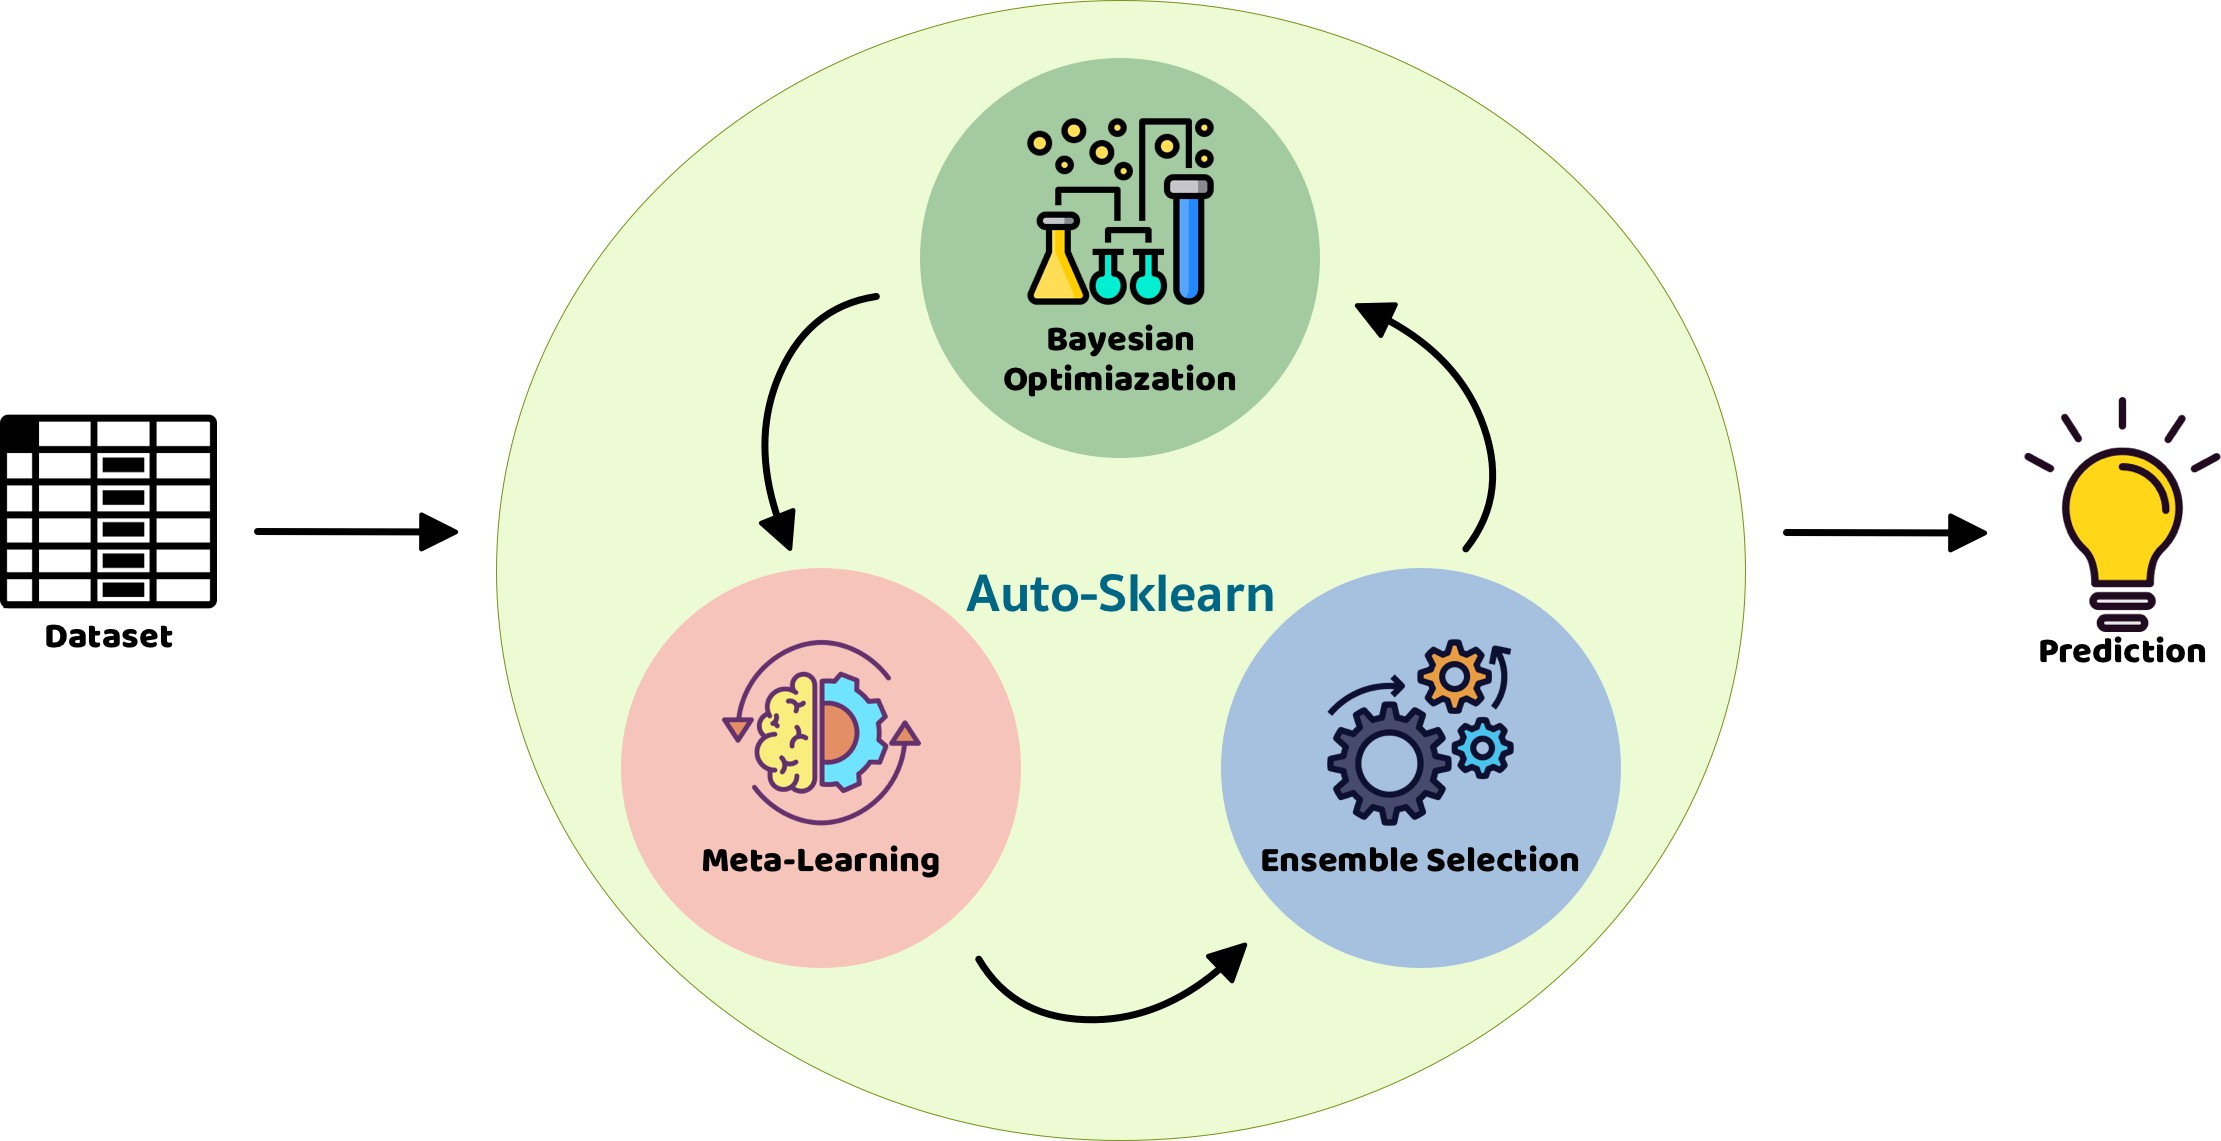

## Auto SK Learn: 

### auto-sklearn frees a machine learning user from algorithm selection and hyperparameter tuning. It leverages recent advantages in Bayesian optimization, meta-learning and ensemble construction.

In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

In [ ]:
import autosklearn

In [ ]:
import autosklearn.regression as reg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/flight data.csv")

In [ ]:
df.head()

In [ ]:
df1= pd.read_csv("/content/drive/MyDrive/flight test.csv")

We will use the same x_train and y_train data

In [ ]:
x_train

In [ ]:
automl = reg.AutoSklearnRegressor(time_left_for_this_task=120,per_run_time_limit=30)

In [ ]:
automl.fit(x_train,y_train)

In [ ]:
print(automl.leaderboard())

In [ ]:
print(automl.show_models())

In [ ]:
ypred2= automl.predict(x_test)

In [ ]:
ypred2

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-ypred2)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, ypred2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("ypred2")
plt.show()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred2))
print('MSE:', metrics.mean_squared_error(y_test, ypred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred2)))